In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_data = pd.read_csv("../results/preprocessing/01_dataset_preprocessing.csv")

In [17]:
df_data

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40,1,2,140.0,294.0,172.0,0,108.00,43.0,92.0,19.0,0.467386,0,0,0,1,0,0,1,0
1,49,0,3,160.0,180.0,156.0,0,75.00,47.0,90.0,18.0,0.467386,0,0,0,1,0,0,1,0
2,37,1,2,130.0,294.0,156.0,0,98.00,53.0,102.0,23.0,0.467386,0,0,0,1,0,0,1,0
3,48,0,4,138.0,214.0,156.0,1,72.00,51.0,118.0,18.0,0.467386,0,0,0,1,0,0,1,0
4,54,1,3,150.0,195.0,156.0,0,108.00,90.0,83.0,21.0,0.467386,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546,80,0,0,111.0,153.0,166.0,0,83.75,31.0,108.0,18.6,0.467386,1,0,0,1,0,0,1,0
6547,81,0,0,123.0,157.0,160.0,0,125.20,23.0,89.0,40.0,0.467386,0,0,0,1,0,0,1,0
6548,81,0,0,127.0,185.0,141.0,0,82.99,41.0,95.0,30.6,0.467386,0,0,1,0,0,0,1,0
6549,51,1,0,123.0,161.0,162.0,0,166.29,34.0,93.0,25.6,0.467386,0,0,1,0,0,1,0,0


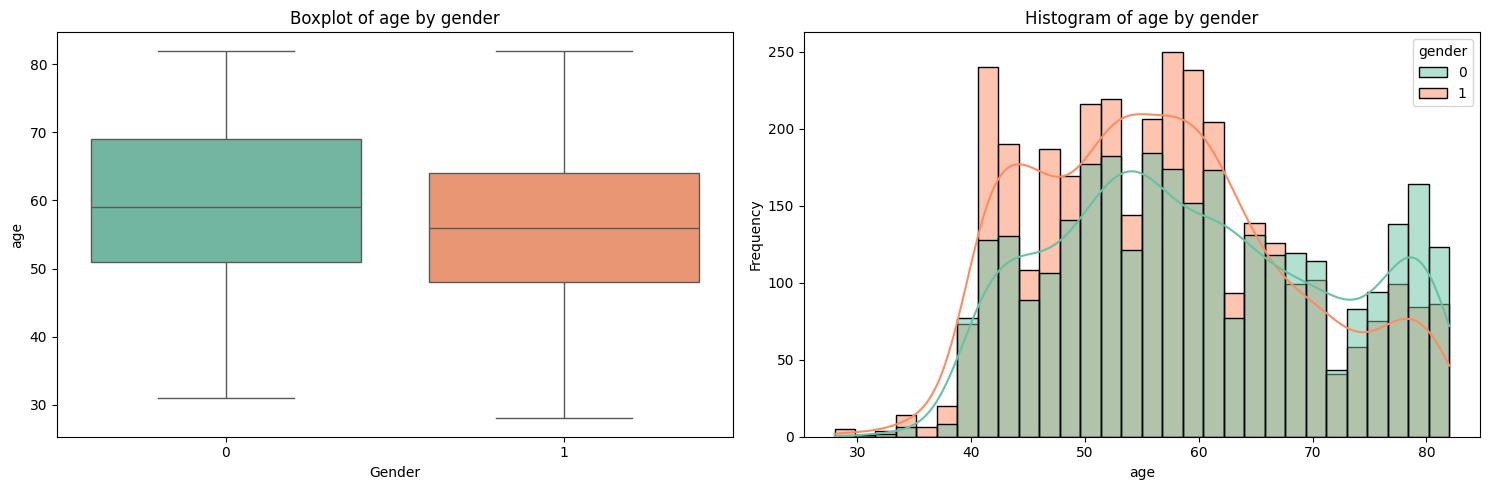

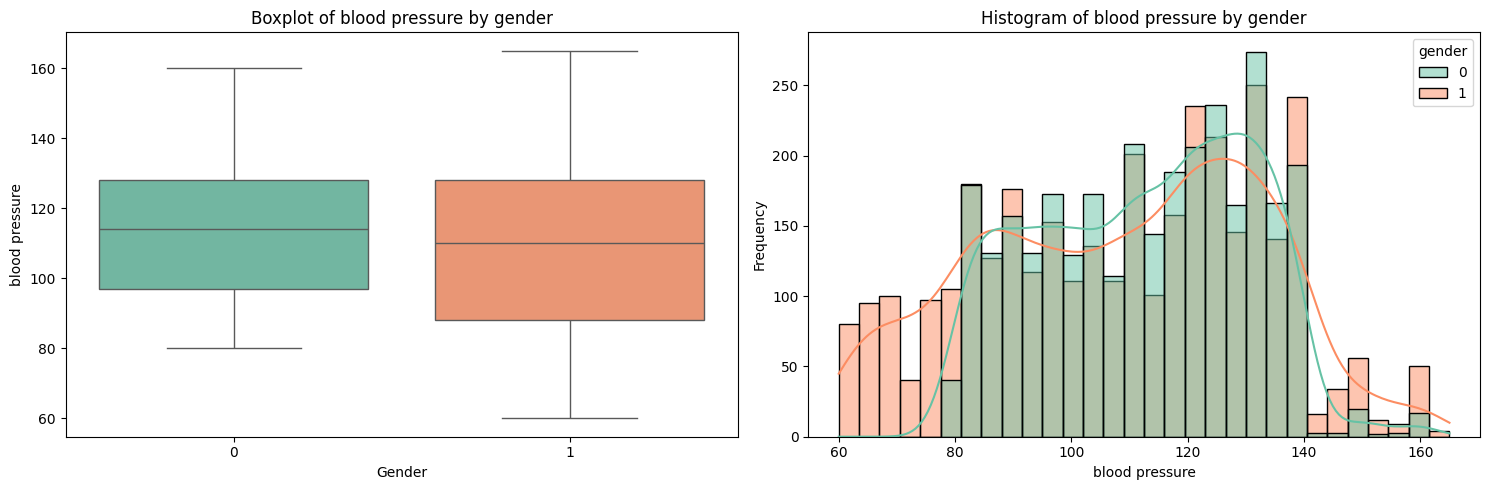

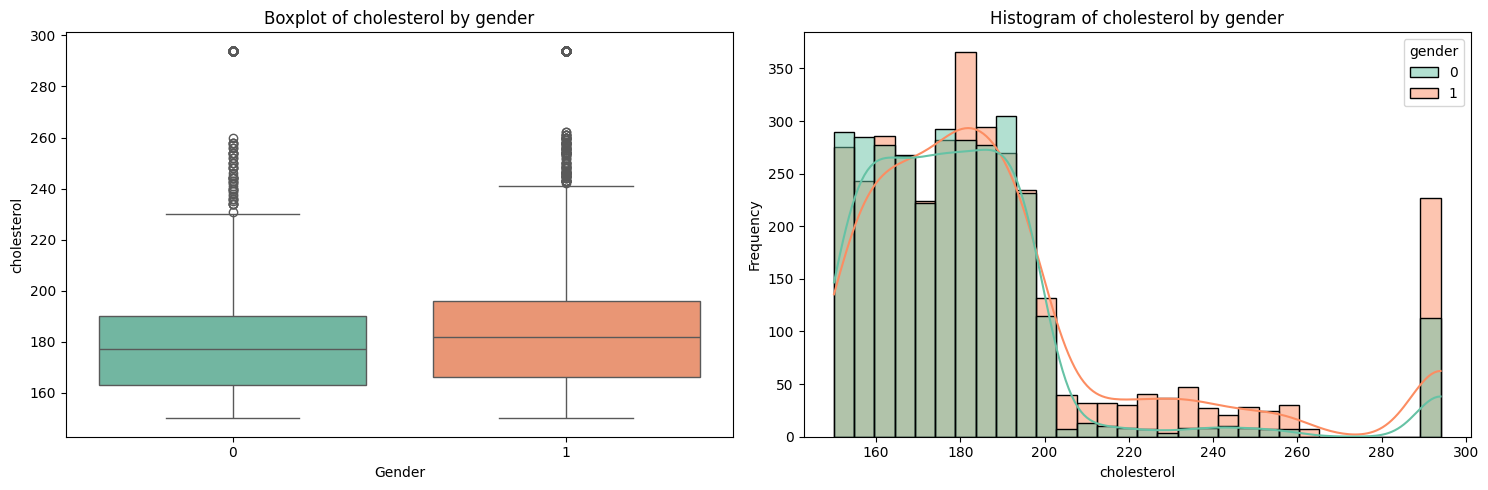

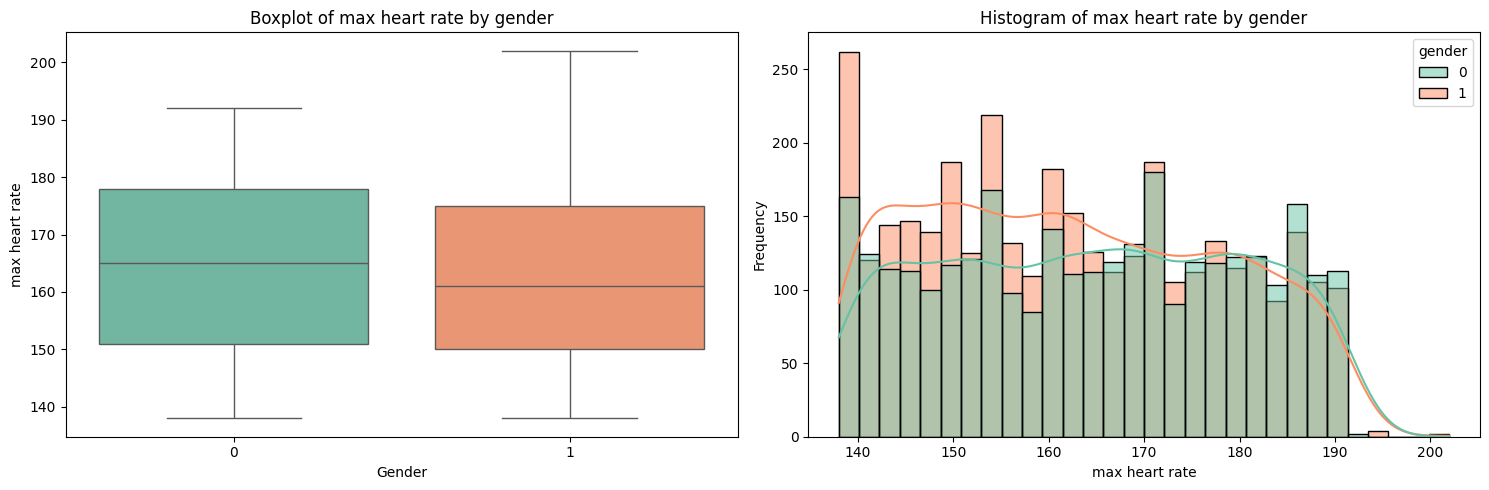

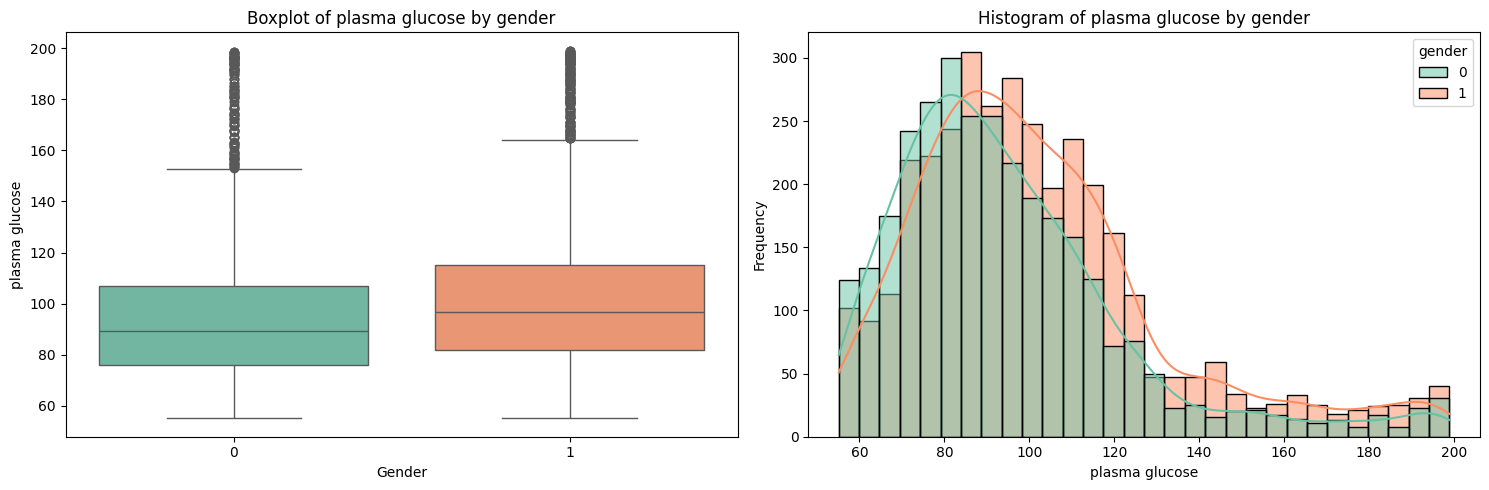

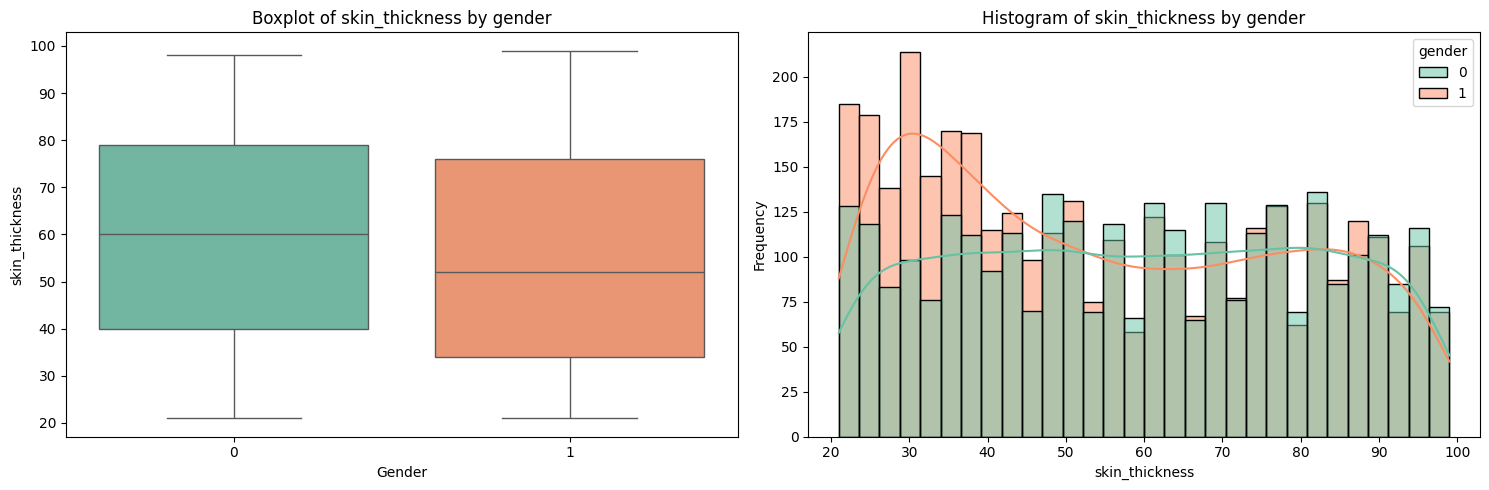

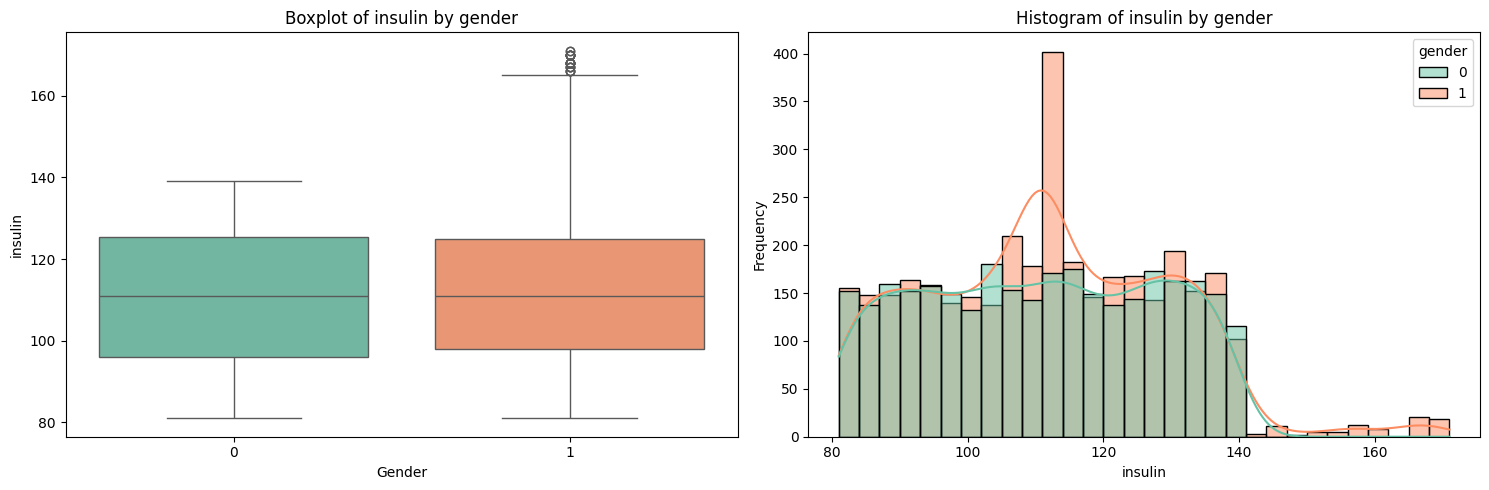

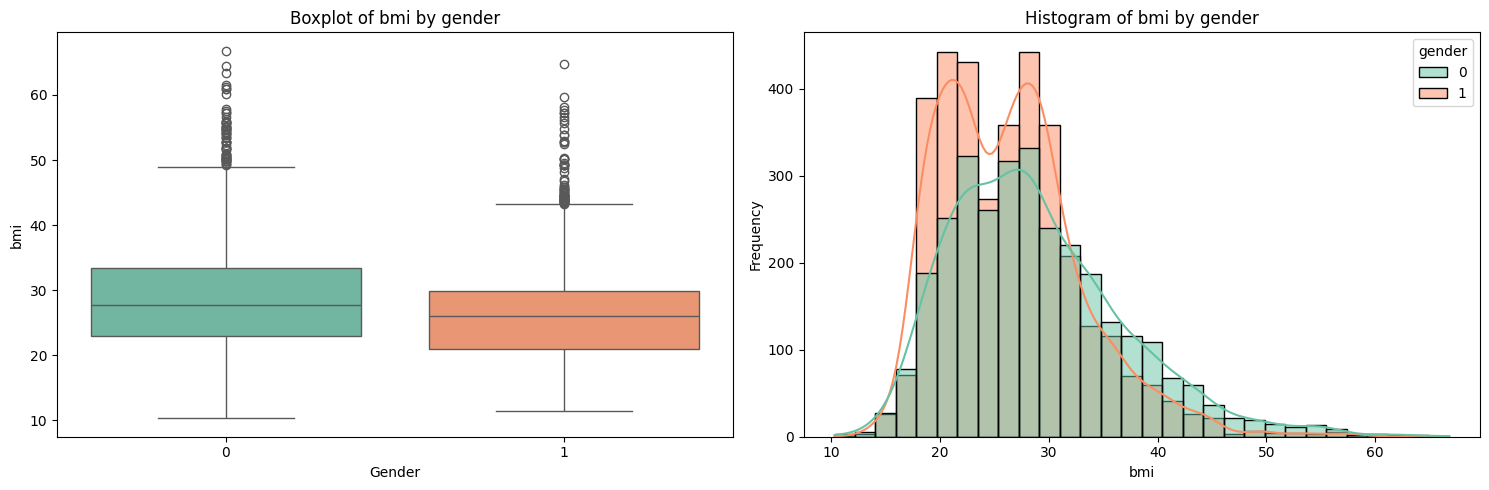

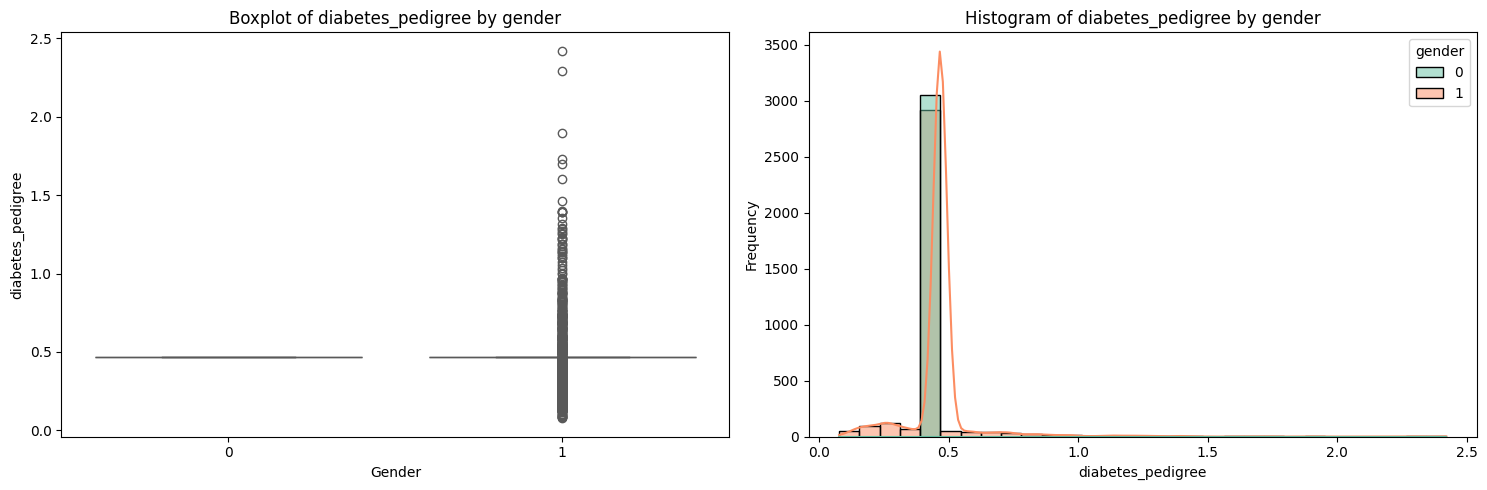

In [18]:
columns = ['age', 'blood pressure', 'cholesterol', 'max heart rate', 'plasma glucose', 
           'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']

for col in columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(data=df_data, x='gender', y=col, palette='Set2', ax=axes[0])
    axes[0].set_title(f'Boxplot of {col} by gender')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel(col)

    # Histograma
    sns.histplot(data=df_data, x=col, hue='gender', kde=True, palette='Set2', bins=30, ax=axes[1])
    axes[1].set_title(f'Histogram of {col} by gender')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [19]:
df_data[df_data["gender"] == 0]["diabetes_pedigree"].value_counts()

diabetes_pedigree
0.467386    3055
Name: count, dtype: int64

In [20]:
# diabetes_pedigree corresponde a la medición de predisposición hereditaria a la diabetes, 
# sin embargo el 100% (3258) de los hombres presentan exactamente el mismo valor lo que 
# podria indicar un error en el resgistro de los datos

df_data = df_data.drop(columns=['diabetes_pedigree'])

In [21]:
df_data.to_csv("../results/preprocessing/02_dataset_preprocessing.csv", index=False)